## Desenvolvimento da 1a Etapa

### Função

In [1]:
import os
def read_directories(directory, img=None):
    # Get a list of filenames in the specified directory
    filenames = []
    for filename in os.listdir(directory):
        if img is not None:
            # If 'img' is provided, filter filenames containing it
            if img in filename:   
                filenames.append(filename)          
        else:
            filenames.append(filename)    
    return filenames

### Diretório das imagens

In [2]:
dir_images = f'images_filtered'
dir_atlas = f'atlas_resampled'
array_images = read_directories(dir_images)
array_atlas = read_directories(dir_atlas)

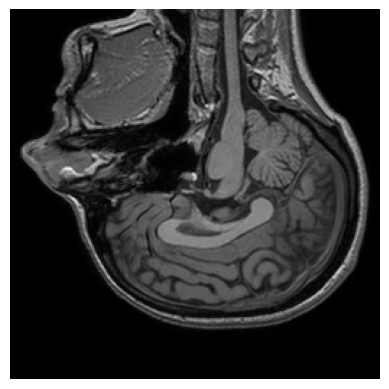

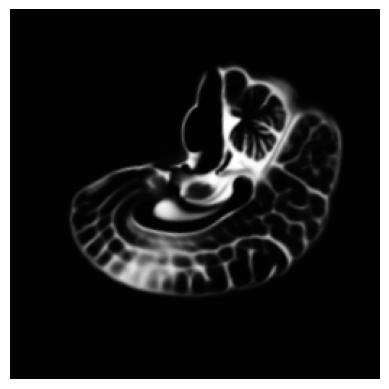

In [3]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Carregar a imagem
imagem = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")
atlas_csf = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_csf.nii.gz")


# Converter para array numpy
array_imagem = sitk.GetArrayFromImage(imagem)

data_min = np.min(array_imagem)
data_max = np.max(array_imagem)
normalized_data = (array_imagem - data_min) / (data_max - data_min) * 255
normalized_data = normalized_data.astype(np.uint8)



array_atlas = sitk.GetArrayFromImage(atlas_csf)

indice_fatia = array_imagem.shape[0] // 2  
fatia_img = array_imagem[indice_fatia, :, :]

indice_fatia = array_atlas.shape[0] // 2  
fatia_atlas = array_atlas[indice_fatia, :, :]


# Exibir a imagem
plt.imshow(fatia_img, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()


# Exibir a imagem
plt.imshow(fatia_atlas, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

In [11]:
#imagem que vai ser usada como teste
imagem = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")

# Converter para array numpy
img_np = sitk.GetArrayFromImage(imagem)

data_min = np.min(img_np)
data_max = np.max(img_np)
normalized_data = (img_np - data_min) / (data_max - data_min) * 255
normalized_data = normalized_data.astype(np.uint8)


atlas_csf = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_csf.nii.gz")
atlas_gm = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_gm.nii.gz")
atlas_wm = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_wm.nii.gz")

atlas_csf_array = sitk.GetArrayFromImage(atlas_csf)
atlas_gm_array = sitk.GetArrayFromImage(atlas_gm)
atlas_wm_array = sitk.GetArrayFromImage(atlas_wm)


binary_array_csf = (atlas_csf_array > 0.98).astype(np.uint8)
binary_array_gm = (atlas_gm_array > 0.98).astype(np.uint8)
binary_array_wm = (atlas_wm_array > 0.98).astype(np.uint8)

# Converter de volta para imagem SimpleITK
binary_image_csf = sitk.GetImageFromArray(binary_array_csf)
binary_image_csf.CopyInformation(atlas_csf)  # Mantém metadados da imagem original

binary_image_gm = sitk.GetImageFromArray(binary_array_gm)
binary_image_gm.CopyInformation(atlas_gm)  # Mantém metadados da imagem original

binary_image_wm = sitk.GetImageFromArray(binary_array_wm)
binary_image_wm.CopyInformation(atlas_wm)  # Mantém metadados da imagem original


# num_pixels_1 = np.count_nonzero(binary_array)

# print(f"Número de pixels com valor 1: {num_pixels_1}")

sitk.WriteImage(binary_image_csf, "mni_csf_binary.nii.gz")
sitk.WriteImage(binary_image_gm, "mni_gm_binary.nii.gz")
sitk.WriteImage(binary_image_wm, "mni_wm_binary.nii.gz")

# Exibir a imagem
#plt.imshow(binary_image_wm, cmap="gray")  # Use "gray" para imagens em preto e branco
#plt.axis("off")  # Remove os eixos
#plt.show()


In [12]:
binary_atlas_csf = sitk.ReadImage("mni_csf_binary.nii.gz")
binary_atlas_gm = sitk.ReadImage("mni_gm_binary.nii.gz")
binary_atlas_wm = sitk.ReadImage("mni_wm_binary.nii.gz")

#img_sitk = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")
#img_np = sitk.GetArrayFromImage(img_sitk)

mask_np_csf = sitk.GetArrayFromImage(binary_atlas_csf)

# Garantir que a máscara seja binária (0 e 1)
mask_np_csf = (mask_np_csf > 0).astype(np.uint8)


mask_np_gm = sitk.GetArrayFromImage(binary_atlas_gm)

# Garantir que a máscara seja binária (0 e 1)
mask_np_gm = (mask_np_gm > 0).astype(np.uint8)


mask_np_wm = sitk.GetArrayFromImage(binary_atlas_wm)

# Garantir que a máscara seja binária (0 e 1)
mask_np_wm = (mask_np_wm > 0).astype(np.uint8)

# Multiplicar elemento a elemento
result_np_csf = (normalized_data * mask_np_csf)
result_np_gm = (normalized_data * mask_np_gm)
result_np_wm = (normalized_data * mask_np_wm)

# Converter de volta para SimpleITK
result_sitk_csf = sitk.GetImageFromArray(result_np_csf)
result_sitk_csf.CopyInformation(imagem)  # Copiar metadados da imagem original

result_sitk_gm = sitk.GetImageFromArray(result_np_gm)
result_sitk_gm.CopyInformation(imagem)  # Copiar metadados da imagem original

result_sitk_wm = sitk.GetImageFromArray(result_np_wm)
result_sitk_wm.CopyInformation(imagem)  # Copiar metadados da imagem original

# Salvar a nova imagem
sitk.WriteImage(result_sitk_csf, "result_sitk_csf.nii.gz")
sitk.WriteImage(result_sitk_gm, "result_sitk_gm.nii.gz")
sitk.WriteImage(result_sitk_wm, "result_sitk_wm.nii.gz")




In [4]:
result_atlas_csf = sitk.ReadImage("result_sitk_csf.nii.gz")
result_atlas_gm = sitk.ReadImage("result_sitk_gm.nii.gz")
result_atlas_wm = sitk.ReadImage("result_sitk_wm.nii.gz")

result_np_csf = sitk.GetArrayFromImage(result_atlas_csf)
result_np_gm = sitk.GetArrayFromImage(result_atlas_gm)
result_np_wm = sitk.GetArrayFromImage(result_atlas_wm)



In [31]:
print(type(result_np_csf))
print(result_np_csf.shape)



<class 'numpy.ndarray'>
(150, 256, 256)


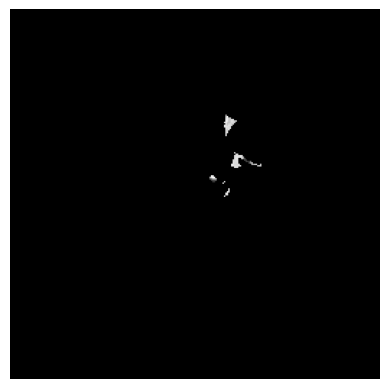

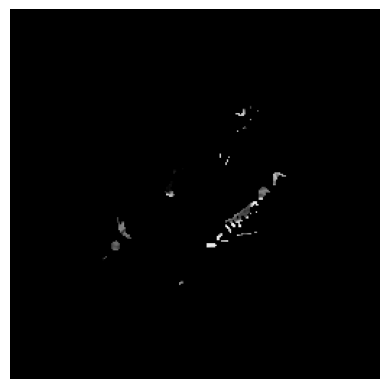

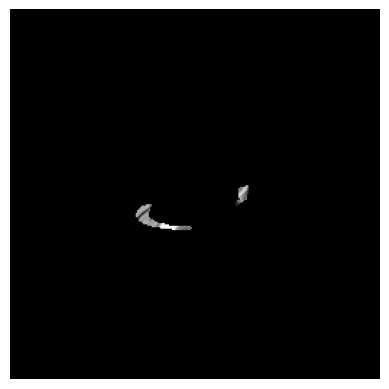

In [5]:


indice_fatia_csf = result_np_csf.shape[0] // 2  
fatia_img_csf = result_np_csf[indice_fatia_csf, :, :]

indice_fatia_gm = result_np_gm.shape[0] // 2  
fatia_img_gm = result_np_gm[indice_fatia_gm, :, :]

indice_fatia_wm = result_np_wm.shape[0] // 2  
fatia_img_wm = result_np_wm[indice_fatia_wm, :, :]


# Exibir a imagem
plt.imshow(fatia_img_csf, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

# Exibir a imagem
plt.imshow(fatia_img_gm, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

# Exibir a imagem
plt.imshow(fatia_img_wm, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

In [6]:
num_pixels_csf = np.count_nonzero(result_np_csf)
print(f"Número de pixels com valor maior que zero csf: {num_pixels_csf}\n")
num_pixels_gm = np.count_nonzero(result_np_gm)
print(f"Número de pixels com valor maior que zero gm: {num_pixels_gm}\n")
num_pixels_wm = np.count_nonzero(result_np_wm)
print(f"Número de pixels com valor maior que zero wm: {num_pixels_wm}\n")


Número de pixels com valor maior que zero csf: 3578

Número de pixels com valor maior que zero gm: 15009

Número de pixels com valor maior que zero wm: 140875



In [7]:
vetor_np_csf = result_np_csf[result_np_csf>0]
vetor_np_csf_mean = np.mean(vetor_np_csf)
print(f"Vetor final média csf: {vetor_np_csf_mean}.")

vetor_np_gm = result_np_gm[result_np_gm>0]
vetor_np_gm_mean = np.mean(vetor_np_gm)
print(f"Vetor final média gm: {vetor_np_gm_mean}.")


vetor_np_wm = result_np_wm[result_np_wm>0]
vetor_np_wm_mean = np.mean(vetor_np_wm)
print(f"Vetor final média wm: {vetor_np_wm_mean}.")



Vetor final média csf: 93.50223588596981.
Vetor final média gm: 69.17902591778267.
Vetor final média wm: 89.96611180124223.


In [8]:
print(f"Máximo csf: {np.max(result_np_csf)}, mínimo: {np.min(vetor_np_csf)}.")
print(f"Máximo gm: {np.max(result_np_gm)}, mínimo: {np.min(vetor_np_gm)}.")
print(f"Máximo wm: {np.max(result_np_wm)}, mínimo: {np.min(vetor_np_wm)}.")


Máximo csf: 127, mínimo: 1.
Máximo gm: 218, mínimo: 1.
Máximo wm: 207, mínimo: 1.


### Usar o kmeans com as três médias advindas das imagens. Fazer a clusterização da imagem original mediante as três médias.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# Carregar a imagem com Nibabel
image_path = "images_filtered\IXI002-Guys-0828-T1.nii.gz"  # Modifique para o caminho da sua imagem
nifti_image = nib.load(image_path)
image_data = nifti_image.get_fdata()  # Dados da imagem como um array NumPy

# Definir as médias fornecidas para os 3 clusters
cluster_means = np.array([30, 100, 200])  # Exemplo de médias para os 3 clusters

# Número de clusters
k = len(cluster_means)

# Inicializar aleatoriamente os centroids com base nas médias fornecidas
centroids = cluster_means.copy()

# Função para atribuir cada pixel ao cluster mais próximo
def assign_to_cluster(image_data, centroids):
    distances = np.abs(image_data[..., None] - centroids)  # Distância entre cada pixel e os centroids
    return np.argmin(distances, axis=-1)  # Atribui ao cluster com a menor distância

# Função para atualizar os centroids
def update_centroids(image_data, labels, k):
    new_centroids = np.zeros(k)
    for i in range(k):
        # Calcular a média dos pixels atribuídos a cada cluster
        new_centroids[i] = np.mean(image_data[labels == i])
    return new_centroids

# Número máximo de iterações
max_iters = 100
tolerance = 1e-4
prev_centroids = np.zeros_like(centroids)

# Iteração do K-means
for iteration in range(max_iters):
    # Atribuir os pixels aos clusters
    labels = assign_to_cluster(image_data, centroids)
    
    # Atualizar os centroids
    centroids = update_centroids(image_data, labels, k)
    
    # Verificar convergência (quando os centroids não mudam mais)
    if np.all(np.abs(centroids - prev_centroids) < tolerance):
        print(f"Convergência atingida após {iteration + 1} iterações.")
        break
    
    prev_centroids = centroids.copy()

# Exibir os resultados
segmented_image = labels

# Mostrar um corte da segmentação
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image[int(segmented_image.shape[0] / 2)], cmap="jet")
plt.title("Segmentação K-means com 3 classes (NumPy)")
plt.colorbar()
plt.show()

ModuleNotFoundError: No module named 'nibabel'

In [ ]:
from sklearn import cluster
#from sklearn.cluster import KMeans

# Carregar a imagem
#image_path = "sua_imagem.nii"  # Modifique para o caminho da sua imagem
#image = sitk.ReadImage(image_path)
image_array = sitk.GetArrayFromImage(normalized_data)  # Converter para NumPy

# Converter para 1D (o K-means do sklearn espera uma matriz 2D)
pixels = image_array.flatten().reshape(-1, 1)

# Médias dos três clusters (defina os valores conforme necessário)
cluster_means = np.array([[vetor_np_csf_mean], [vetor_np_gm_mean], [vetor_np_wm_mean]])  # Exemplo de valores médios

# Aplicar K-means com centróides iniciais
kmeans = KMeans(n_clusters=3, init=cluster_means, n_init=1, random_state=42)
labels = kmeans.fit_predict(pixels)

# Remontar a imagem segmentada
segmented_image = labels.reshape(image_array.shape)

# Mostrar o resultado
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image[int(segmented_image.shape[0] / 2)], cmap="jet")  # Exibir um corte no meio
plt.title("Segmentação com K-means (3 classes)")
plt.colorbar()
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [18]:

num_pixels_csf = np.count_nonzero(fatia_img_csf)
print(f"Número de pixels com valor 1: {num_pixels_csf}\n")
num_pixels_gm = np.count_nonzero(fatia_img_gm)
print(f"Número de pixels com valor 1: {num_pixels_gm}\n")
num_pixels_wm = np.count_nonzero(fatia_img_wm)
print(f"Número de pixels com valor 1: {num_pixels_wm}\n")

Número de pixels com valor 1: 154

Número de pixels com valor 1: 416

Número de pixels com valor 1: 277



In [38]:
flattened_array = fatia_img_csf.flatten()


print(fatia_img_csf.shape)
num_rows, num_cols = fatia_img_csf.shape
for num_row in range(num_rows):
    for num_col in range(num_cols):
        if fatia_img_csf[num_row,num_col] ==1:
            fatia_img_csf[num_row,num_col] 


(256, 256)


In [41]:
max = np.max(flattened_array)
print(max)


493.0


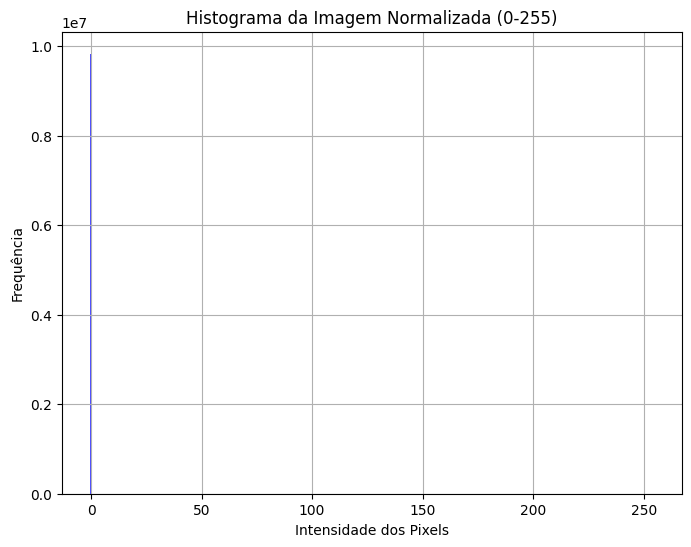

In [12]:
# Normalizar para o intervalo [0, 255]
image_min = result_np_csf.min()
image_max = result_np_csf.max()
normalized_array = (result_np_csf - image_min) / (image_max - image_min) * 255

# Converter para inteiros (uint8)
image_uint8 = normalized_array.astype(np.uint8)

hist, bin_edges = np.histogram(image_uint8.flatten(), bins=256, range=(0, 255))

# Exibir histograma
plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], hist, width=1, color='blue', alpha=0.7)
plt.xlabel("Intensidade dos Pixels")
plt.ylabel("Frequência")
plt.title("Histograma da Imagem Normalizada (0-255)")
plt.grid(True)
plt.show()


In [11]:

result_sitk_wm = sitk.GetImageFromArray(result_np_csf)

indice_fatia = result_sitk_wm.shape[0] // 2  
fatia_atlas = result_sitk_wm[indice_fatia, :, :]

# Exibir a imagem
plt.figure(figsize=(8, 6))
plt.imshow(fatia_atlas, "gray")  # Use "gray" para imagens em preto e branco
#plt.axis("off")  # Remove os eixos
plt.show()


AttributeError: 'Image' object has no attribute 'shape'